In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [16]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

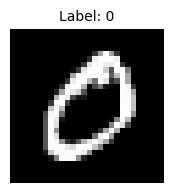

In [19]:
image = x_train[1]
label = y_train[1]

plt.figure(figsize=(2,2)) 
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}", fontsize=10)
plt.axis('off')
plt.show()


In [21]:
#Normalise the pixel values to [0,1]
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In [22]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test  = x_test.reshape(x_test.shape[0], 28*28)

In [23]:
#Building the network using the simple neural network and later we will practice using CNN and other methods
model = keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [24]:
#compiling the model
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [25]:
history = model.fit(x_train,y_train , epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7114 - loss: 0.9332 - val_accuracy: 0.8787 - val_loss: 0.4424
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8754 - loss: 0.4291 - val_accuracy: 0.9133 - val_loss: 0.3018
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8992 - loss: 0.3471 - val_accuracy: 0.9197 - val_loss: 0.2715
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9101 - loss: 0.3088 - val_accuracy: 0.9320 - val_loss: 0.2367
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9190 - loss: 0.2772 - val_accuracy: 0.9378 - val_loss: 0.2146


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9760 - loss: 0.0804
Test accuracy: 0.9760


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


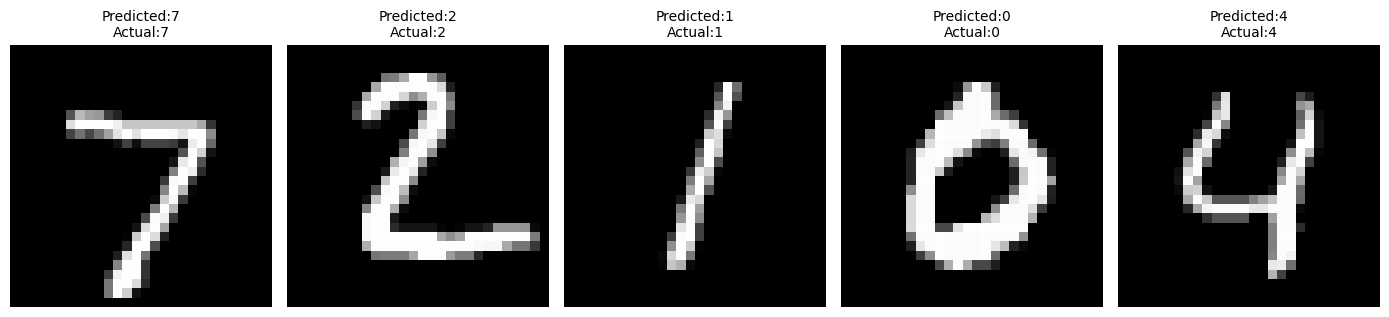

In [27]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test[:5])

plt.figure(figsize=(14, 6)) 

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted:{np.argmax(predictions[i])}\nActual:{y_test[i]}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


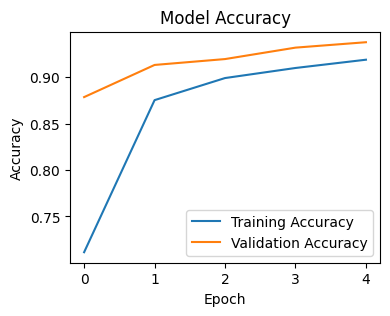

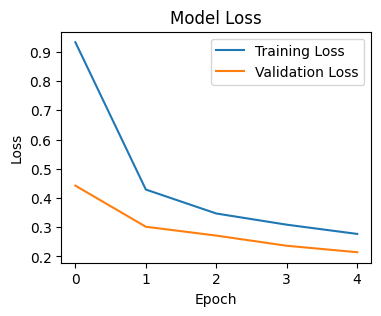

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(4,3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(4,3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Visualising the Boundries with Principle component analysis

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Predict on test set
preds = model.predict(x_test)
pred_labels = np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


In [31]:
pca = PCA(n_components=50)
x_test_pca = pca.fit_transform(x_test)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
x_test_tsne = tsne.fit_transform(x_test_pca)


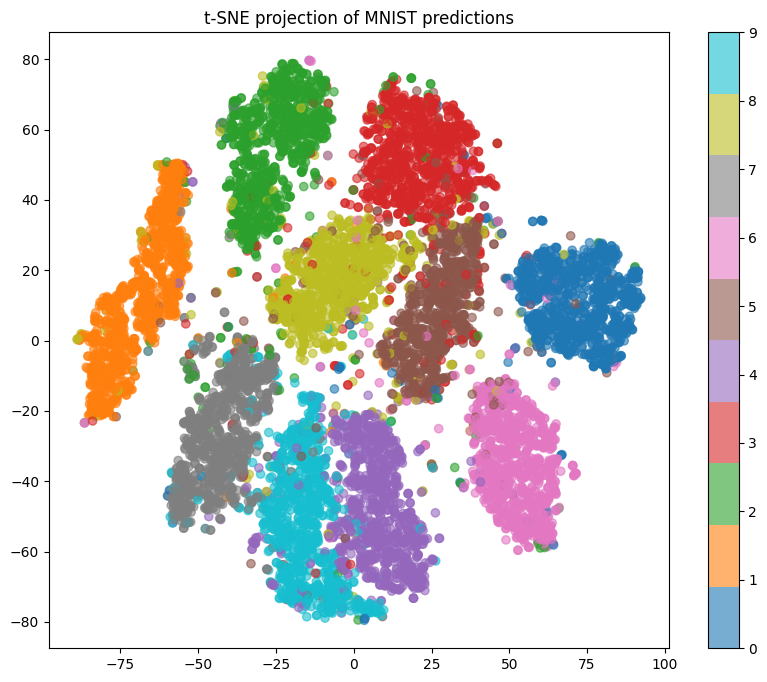

In [32]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(x_test_tsne[:,0], x_test_tsne[:,1], 
                      c=pred_labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE projection of MNIST predictions")
plt.show()
